<a href="https://colab.research.google.com/github/Hutch03/Portafolio/blob/main/python-ciencia-datos/analisis_modelos/Telcom_X_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🤖Análisis de modelos supervisados para la clasificación de datos


##📊1.Datos a analizar

###1.1.Ingesta de datos

In [374]:
#Librearía
import pandas as pd

In [375]:
#Importar datos
df=pd.read_csv('df_final.csv')
df.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PagoAutomatico
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,9,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,4,1,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,1,0,0,0,0,1,0,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


###1.2.Revisiónd e información

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [377]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PagoAutomatico
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,0.435580
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,0.495868
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [378]:
#Data de muestra
df.sample(1).T

,3387
Churn,1.00
SeniorCitizen,0.00
Partner,0.00
Dependents,0.00
tenure,25.00
PhoneService,1.00
MultipleLines,1.00
OnlineSecurity,0.00
OnlineBackup,0.00
DeviceProtection,0.00


In [379]:
#Columnas a normalizar (en proceso de entrenamiento)
columnas_normalizar=['tenure','Charges.Monthly','Charges.Total']

In [380]:
#Revisión de variable de respuesta
df['Churn'].value_counts(normalize=True)
#Se debe tener en cuenta al revisar los hiperparámetros del modelo

,proportion
Churn,
0,0.734215
1,0.265785


###1.3.Revisión de correlación

In [381]:
import pandas as pd
import numpy as np

# Matriz de correlación
corr_matrix = df.corr().abs()

# Elimina duplicados (parte inferior + diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Filtra las correlaciones mayores a 0.65 (puedes ajustar el umbral)
correlation_threshold = 0.65
high_corr = upper.stack()[upper.stack() > correlation_threshold].sort_values(ascending=False)
print(high_corr)


gender_Female    gender_Male                    1.000000
tenure           Charges.Total                  0.825880
Charges.Monthly  InternetService_Fiber optic    0.787195
                 InternetService_0              0.763191
                 Charges.Total                  0.651065
dtype: float64


In [382]:
df.corr()['Churn'].sort_values()

,Churn
tenure,-0.354049
Contract_Two year,-0.301552
InternetService_0,-0.227578
PagoAutomatico,-0.210420
Charges.Total,-0.199484
Contract_One year,-0.178225
OnlineSecurity,-0.171270
TechSupport,-0.164716
Dependents,-0.163128
Partner,-0.149982


###1.4 Conclusiones del ánalisis de datos

*   Las columnas: **tenure,Charges.Monthly,Charges.Total**; presentan valores
numéricos que deben ser normalizados durante el entrenamiento.

*   Se considera 0.65 como umbral para evaluar la multicolinealidad.

*   La columna **gender_Male** debe ser elimina del modelo y mantenerse **gender_Female**.


*   La columna  **Charges.Total** debe eliminarse por presentar correlación con variable **tenure**.

*   La columna **Charges.Monthly** se mantendrá, a pesar de presentar nivel significativo de correlación con otras variables. Su permanencia se validará con su participación en el modelo.

*   La columna **PagoAutomatico** debe eliminarse, ya que es creada a partir de los datos de **PaymentMethod**

##⚙️2.Estructuración del modelo

###2.1.Eliminación de columnas

In [383]:
#Mantener variables a revisar
df_modelo=df.drop(columns=['Charges.Total','gender_Male','PagoAutomatico'])
df_modelo.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


###2.2.Separación de data

In [384]:
#Importación de función para separación de texto
from sklearn.model_selection import train_test_split

In [385]:
#Definición de variables
X=df_modelo.drop(columns=['Churn'])
y=df_modelo['Churn']

In [386]:
#División de datos

X,X_test,y,y_test=train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
'''
(X,y)test= Prueba (data no presentada al modelo)
(X,y)= Entrenamiento+validación
'''


'\n(X,y)test= Prueba (data no presentada al modelo)\n(X,y)= Entrenamiento+validación\n'

###2.3.Modelo dummy


In [387]:
#Datos a usar (25% para validación)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)

In [388]:
#Importación de función de modelo dummy
from sklearn.dummy import DummyClassifier

In [389]:
#Entrenamiento del modelo
modelo_dummy=DummyClassifier(strategy='most_frequent')
modelo_dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [390]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Predicción del modelo dummy
y_pred_dummy = modelo_dummy.predict(X_val)

# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_dummy))
print("Precision:", precision_score(y_val, y_pred_dummy, average='binary'))
print("Recall:", recall_score(y_val, y_pred_dummy, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_dummy, average='binary'))

# R0esumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_dummy))


Accuracy: 0.7344481605351171
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1098
           1       0.00      0.00      0.00       397

    accuracy                           0.73      1495
   macro avg       0.37      0.50      0.42      1495
weighted avg       0.54      0.73      0.62      1495



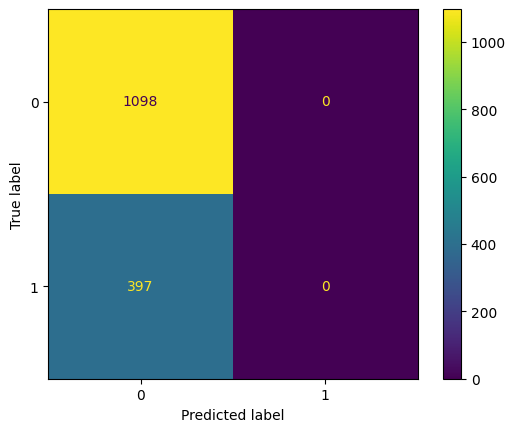

In [391]:
#Revisión visual de matriz de confusión de modelo dummy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_dummy.classes_)
disp.plot();

###2.4.Modelo de árbol de decisiones

In [456]:
# Funciones para modelado
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
# Funciones para sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier


####2.4.1.Árbol de 10 ramas

In [393]:
#Entrenamiento del modelo: 10 rams máximo
arbol_1 = DecisionTreeClassifier(max_depth=10, random_state=42)
arbol_1.fit(X_train, y_train)  # Para evaluar en X_val

DecisionTreeClassifier(max_depth=10, random_state=42)

In [394]:
#Cálculo de predicciones
y_pred_1 = arbol_1.predict(X_val)

In [395]:
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_1))
print("Precision:", precision_score(y_val, y_pred_1, average='binary'))
print("Recall:", recall_score(y_val, y_pred_1, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_1, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_1))

Accuracy: 0.7665551839464882
Precision: 0.5638297872340425
Recall: 0.5340050377833753
F1-score: 0.5485122897800776

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1098
           1       0.56      0.53      0.55       397

    accuracy                           0.77      1495
   macro avg       0.70      0.69      0.70      1495
weighted avg       0.76      0.77      0.76      1495



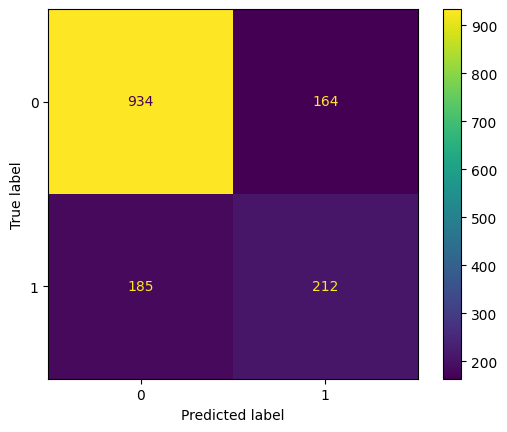

In [396]:
#Revisión visual de matriz de confusión de modelo arbol 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_1.classes_)
disp.plot();

In [397]:
#Revisión de Recall con validación cruzada
recall_scores_1 = cross_val_score(
    arbol_1, X, y, scoring='recall', cv=5
)
#Construcción del intervalo de confianza
recall_scores_1_media=recall_scores_1.mean()
recall_scores_1_desvst=recall_scores_1.std()
print(f'El recall del modelo 1 es {round(recall_scores_1_media,3)} +- {round(recall_scores_1_desvst*2,3)}')

El recall del modelo 1 es 0.529 +- 0.053


In [398]:
#Revisión de feautures
feature_importace=pd.DataFrame({'Features':X.columns,'Importancia':arbol_1.feature_importances_}).sort_values('Importancia',ascending=False)
feature_importace



,Features,Importancia
18,Contract_Month-to-month,0.297098
3,tenure,0.198691
13,Charges.Monthly,0.174023
17,InternetService_Fiber optic,0.072224
1,Partner,0.021728
9,TechSupport,0.021119
0,SeniorCitizen,0.020879
12,PaperlessBilling,0.019413
8,DeviceProtection,0.018517
23,PaymentMethod_Electronic check,0.018329


In [399]:
#Revisión de Recall por feature
# Crear DataFrame para almacenar solo el recall
resultados = pd.DataFrame(index=['Recall'])

# Modelo base
model_features = DecisionTreeClassifier(max_depth=10, random_state=42)

# Tamaños de subconjuntos de features a evaluar
ct_features = [i if i != 0 else 1 for i in range(0, 26, 5)]

# Iterar sobre diferentes cantidades de features
for i in ct_features:
    selected_features = feature_importace['Features'].values[:i]
    X_train_features = X_train[selected_features]
    X_val_features = X_val[selected_features]

    # Entrenar modelo y predecir
    model_features.fit(X_train_features, y_train)
    y_pred_features = model_features.predict(X_val_features)

    # Calcular solo recall
    recall = recall_score(y_val, y_pred_features)

    # Guardar en el DataFrame
    resultados[i] = [recall]

resultados


,1,5,10,15,20,25
Recall,0.0,0.423174,0.463476,0.506297,0.531486,0.536524


In [400]:
#Profundizar entre 20 a 25
# Crear DataFrame para almacenar solo el recall
resultados = pd.DataFrame(index=['Recall'])

# Modelo base
model_features = DecisionTreeClassifier(max_depth=10, random_state=42)

# Tamaños de subconjuntos de features a evaluar
ct_features = [i if i != 0 else 1 for i in range(20, 26, 1)]

# Iterar sobre diferentes cantidades de features
for i in ct_features:
    selected_features = feature_importace['Features'].values[:i]
    X_train_features = X_train[selected_features]
    X_val_features = X_val[selected_features]

    # Entrenar modelo y predecir
    model_features.fit(X_train_features, y_train)
    y_pred_features = model_features.predict(X_val_features)

    # Calcular solo recall
    recall = recall_score(y_val, y_pred_features)

    # Guardar en el DataFrame
    resultados[i] = [recall]

resultados


,20,21,22,23,24,25
Recall,0.531486,0.541562,0.539043,0.528967,0.539043,0.536524


In [401]:
#Features con máximo recall
col_max = resultados.idxmax(axis=1)
print(col_max)

Recall    21
dtype: int64


In [402]:
#Eligiendo 21 features
selected_features=feature_importace['Features'].values[:21]
X_selected_features=X[selected_features]

X_train,X_val,y_train,y_val=train_test_split(X_selected_features,y,stratify=y,random_state=5)

#Entrenamiento del modelo: 10 rams máximo, 17 features
arbol_1 = DecisionTreeClassifier(max_depth=10, random_state=42)
arbol_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [403]:
#Cálculo de predicciones
y_pred_1 = arbol_1.predict(X_val)
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_1))
print("Precision:", precision_score(y_val, y_pred_1, average='binary'))
print("Recall:", recall_score(y_val, y_pred_1, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_1, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_1))

Accuracy: 0.7672240802675585
Precision: 0.5643044619422573
Recall: 0.5415617128463476
F1-score: 0.5526992287917738

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1098
           1       0.56      0.54      0.55       397

    accuracy                           0.77      1495
   macro avg       0.70      0.70      0.70      1495
weighted avg       0.76      0.77      0.77      1495



In [404]:
#Revisión de Recall con validación cruzada
recall_scores_1 = cross_val_score(
    arbol_1, X_selected_features, y, scoring='recall', cv=5,
)
#Construcción del intervalo de confianza
recall_scores_1_media=recall_scores_1.mean()
recall_scores_1_desvst=recall_scores_1.std()
print(f'El recall del modelo 1 es {round(recall_scores_1_media,3)} +- {round(recall_scores_1_desvst*2,3)}')

El recall del modelo 1 es 0.532 +- 0.031


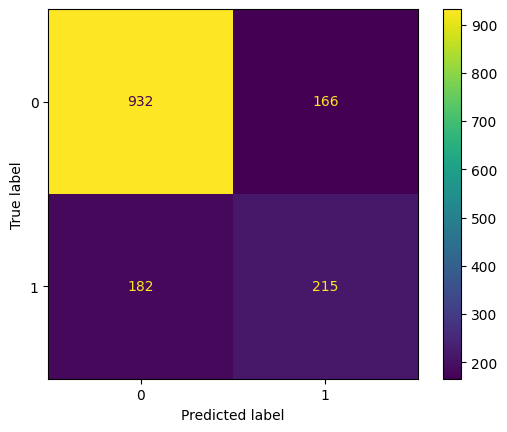

In [405]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_1.classes_)
disp.plot();

In [406]:
#Modelo con data Test
y_pred_val_1 = arbol_1.predict(X_test[selected_features])
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_test, y_pred_val_1))
print("Precision:", precision_score(y_test, y_pred_val_1, average='binary'))
print("Recall:", recall_score(y_test, y_pred_val_1, average='binary'))
print("F1-score:", f1_score(y_test, y_pred_val_1, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_val_1))

Accuracy: 0.7488151658767772
Precision: 0.5265017667844523
Recall: 0.5321428571428571
F1-score: 0.5293072824156305

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       775
           1       0.53      0.53      0.53       280

    accuracy                           0.75      1055
   macro avg       0.68      0.68      0.68      1055
weighted avg       0.75      0.75      0.75      1055



####2.4.2.Árbol con los mejores parámetros

In [407]:
#Entrenamiento de modelo con total de variables
#Datos a usar (25% para validación)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)
# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Métricas
scoring = {'recall': 'recall', 'f1': 'f1', 'accuracy': 'accuracy'}

# Modelo y parámetros
model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': list(range(3, 21, 3)),
    'min_samples_leaf': list(range(1, 6)),
    'min_samples_split': list(range(2, 11, 2))
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    refit='recall',
    cv=cv
)
grid.fit(X_train, y_train)

# Resultados
print("Best params:", grid.best_params_)
mejores_parametros=grid.best_params_

Best params: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [408]:
arbol_2 = DecisionTreeClassifier(**mejores_parametros, random_state=42)
arbol_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

In [409]:
#Cálculo de predicciones
y_pred_2 = arbol_2.predict(X_val)

In [410]:
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_2))
print("Precision:", precision_score(y_val, y_pred_2, average='binary'))
print("Recall:", recall_score(y_val, y_pred_2, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_2, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_2))

Accuracy: 0.7959866220735786
Precision: 0.632183908045977
Recall: 0.5541561712846348
F1-score: 0.5906040268456376

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1098
           1       0.63      0.55      0.59       397

    accuracy                           0.80      1495
   macro avg       0.74      0.72      0.73      1495
weighted avg       0.79      0.80      0.79      1495



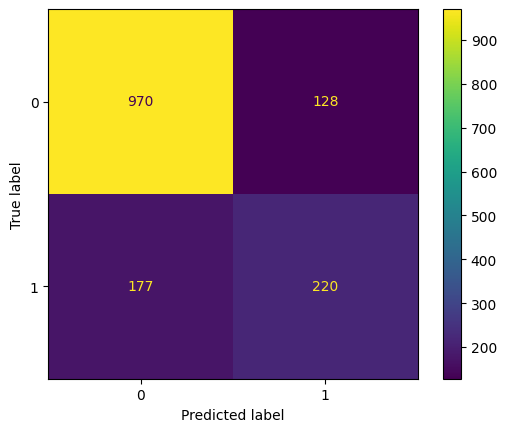

In [412]:
#Revisión visual de matriz de confusión de modelo arbol 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_2.classes_)
disp.plot();

In [414]:
#Revisión de Recall con validación cruzada
recall_scores_2 = cross_val_score(
    arbol_2, X, y, scoring='recall', cv=5
)
#Construcción del intervalo de confianza
recall_scores_2_media=recall_scores_2.mean()
recall_scores_2_desvst=recall_scores_2.std()
print(f'El recall del modelo 1 es {round(recall_scores_2_media,3)} +- {round(recall_scores_2_desvst*2,3)}')

El recall del modelo 1 es 0.578 +- 0.078


In [419]:
#Revisión de feautures
feature_importace=pd.DataFrame({'Features':X.columns,'Importancia':arbol_2.feature_importances_}).sort_values('Importancia',ascending=False)
feature_importace


,Features,Importancia
18,Contract_Month-to-month,0.500683
3,tenure,0.200264
17,InternetService_Fiber optic,0.121715
13,Charges.Monthly,0.060721
23,PaymentMethod_Electronic check,0.021732
15,InternetService_0,0.014347
4,PhoneService,0.012317
5,MultipleLines,0.011896
9,TechSupport,0.010043
6,OnlineSecurity,0.009888


In [420]:
#Revisión de Recall por feature
# Crear DataFrame para almacenar solo el recall
resultados = pd.DataFrame(index=['Recall'])

# Modelo base
model_features = DecisionTreeClassifier(**mejores_parametros, random_state=42)

# Tamaños de subconjuntos de features a evaluar
ct_features = [i if i != 0 else 1 for i in range(0, 26, 5)]

# Iterar sobre diferentes cantidades de features
for i in ct_features:
    selected_features = feature_importace['Features'].values[:i]
    X_train_features = X_train[selected_features]
    X_val_features = X_val[selected_features]

    # Entrenar modelo y predecir
    model_features.fit(X_train_features, y_train)
    y_pred_features = model_features.predict(X_val_features)

    # Calcular solo recall
    recall = recall_score(y_val, y_pred_features)

    # Guardar en el DataFrame
    resultados[i] = [recall]

resultados

,1,5,10,15,20,25
Recall,0.0,0.551637,0.541562,0.549118,0.554156,0.554156


In [422]:
#Profundizar entre 1 a 10
# Crear DataFrame para almacenar solo el recall
resultados = pd.DataFrame(index=['Recall'])

# Modelo base
model_features = DecisionTreeClassifier(**mejores_parametros, random_state=42)

# Tamaños de subconjuntos de features a evaluar
ct_features = [i if i != 0 else 1 for i in range(1, 11, 1)]

# Iterar sobre diferentes cantidades de features
for i in ct_features:
    selected_features = feature_importace['Features'].values[:i]
    X_train_features = X_train[selected_features]
    X_val_features = X_val[selected_features]

    # Entrenar modelo y predecir
    model_features.fit(X_train_features, y_train)
    y_pred_features = model_features.predict(X_val_features)

    # Calcular solo recall
    recall = recall_score(y_val, y_pred_features)

    # Guardar en el DataFrame
    resultados[i] = [recall]

resultados

,1,2,3,4,5,6,7,8,9,10
Recall,0.0,0.335013,0.365239,0.473552,0.551637,0.554156,0.554156,0.518892,0.549118,0.541562


In [423]:
#Features con máximo recall
col_max = resultados.idxmax(axis=1)
print(col_max)

Recall    6
dtype: int64


In [429]:
#Eligiendo 6 features
selected_features=feature_importace['Features'].values[:6]
X_selected_features=X[selected_features]

X_train,X_val,y_train,y_val=train_test_split(X_selected_features,y,stratify=y,random_state=5)

#Entrenamiento del modelo: 10 rams máximo, 17 features
arbol_2 = DecisionTreeClassifier(**mejores_parametros, random_state=42)
arbol_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

In [430]:
#Cálculo de predicciones
y_pred_2 = arbol_2.predict(X_val)
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_2))
print("Precision:", precision_score(y_val, y_pred_2, average='binary'))
print("Recall:", recall_score(y_val, y_pred_2, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_2, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_2))

Accuracy: 0.7953177257525084
Precision: 0.6303724928366762
Recall: 0.5541561712846348
F1-score: 0.5898123324396782

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1098
           1       0.63      0.55      0.59       397

    accuracy                           0.80      1495
   macro avg       0.74      0.72      0.73      1495
weighted avg       0.79      0.80      0.79      1495



In [432]:
#Revisión de Recall con validación cruzada
recall_scores_2 = cross_val_score(
    arbol_2, X_selected_features, y, scoring='recall', cv=5,
)
#Construcción del intervalo de confianza
recall_scores_2_media=recall_scores_2.mean()
recall_scores_2_desvst=recall_scores_2.std()
print(f'El recall del modelo 1 es {round(recall_scores_2_media,3)} +- {round(recall_scores_2_desvst*2,3)}')

El recall del modelo 1 es 0.557 +- 0.137


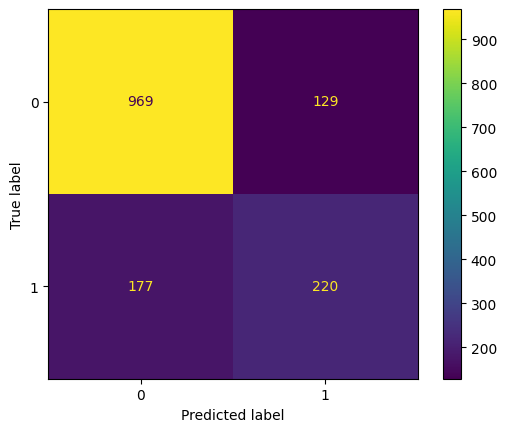

In [434]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_1.classes_)
disp.plot();

In [435]:
#Modelo con data Test
y_pred_val_2 = arbol_2.predict(X_test[selected_features])
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_test, y_pred_val_2))
print("Precision:", precision_score(y_test, y_pred_val_2, average='binary'))
print("Recall:", recall_score(y_test, y_pred_val_2, average='binary'))
print("F1-score:", f1_score(y_test, y_pred_val_2, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_val_2))

Accuracy: 0.7933649289099526
Precision: 0.624
Recall: 0.5571428571428572
F1-score: 0.5886792452830188

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       775
           1       0.62      0.56      0.59       280

    accuracy                           0.79      1055
   macro avg       0.73      0.72      0.73      1055
weighted avg       0.79      0.79      0.79      1055



####2.4.3 Árbol con mejores parámetros y SMOTE

In [439]:
#Oversampling
#Datos a usar (25% para validación)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)
#Definición del modelo (considerando los mejores parámetros calculados)
model=DecisionTreeClassifier(**mejores_parametros,random_state=42)
arbol_3 = ImbPipeline([
    ('oversample', SMOTE(random_state=42)),
    ('arbol', model)
])


In [440]:
#Entrenamiento del modelo
arbol_3.fit(X_train,y_train)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('arbol',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=5,
                                        random_state=42))])

In [441]:
#Cálculo de predicciones
y_pred_3 = arbol_3.predict(X_val)

In [442]:
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_3))
print("Precision:", precision_score(y_val, y_pred_3, average='binary'))
print("Recall:", recall_score(y_val, y_pred_3, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_3, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_3))

Accuracy: 0.7518394648829432
Precision: 0.5237226277372263
Recall: 0.7229219143576826
F1-score: 0.6074074074074074

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1098
           1       0.52      0.72      0.61       397

    accuracy                           0.75      1495
   macro avg       0.70      0.74      0.71      1495
weighted avg       0.79      0.75      0.76      1495



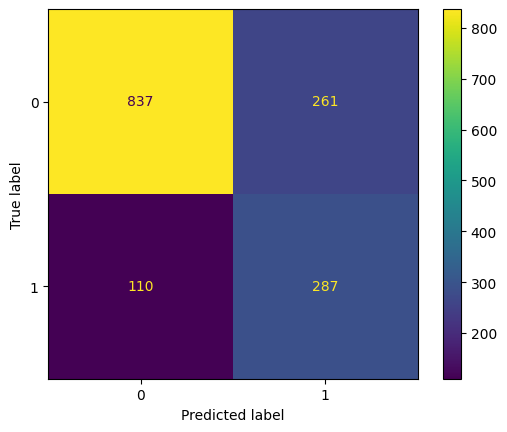

In [443]:
#Revisión visual de matriz de confusión de modelo arbol 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_3.classes_)
disp.plot();

In [444]:
#Revisión de Recall con validación cruzada
recall_scores_3 = cross_val_score(
    arbol_3, X, y, scoring='recall', cv=5
)
#Construcción del intervalo de confianza
recall_scores_3_media=recall_scores_3.mean()
recall_scores_3_desvst=recall_scores_3.std()
print(f'El recall del modelo 1 es {round(recall_scores_3_media,3)} +- {round(recall_scores_3_desvst*2,3)}')

El recall del modelo 1 es 0.722 +- 0.072


In [458]:
#Modelo con data Test
y_pred_val_3 = arbol_3.predict(X_test)
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_test, y_pred_val_3))
print("Precision:", precision_score(y_test, y_pred_val_3, average='binary'))
print("Recall:", recall_score(y_test, y_pred_val_3, average='binary'))
print("F1-score:", f1_score(y_test, y_pred_val_3, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_val_3))

Accuracy: 0.7270142180094786
Precision: 0.49014778325123154
Recall: 0.7107142857142857
F1-score: 0.5801749271137027

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       775
           1       0.49      0.71      0.58       280

    accuracy                           0.73      1055
   macro avg       0.68      0.72      0.69      1055
weighted avg       0.77      0.73      0.74      1055



####2.4.4.Modelo con mejores parámetros y Undersampling

In [447]:
#Undersampling
#Datos a usar (25% para validación)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)
#Definición del modelo (considerando los mejores parámetros calculados)
model=DecisionTreeClassifier(**mejores_parametros,random_state=42)
arbol_4 = ImbPipeline([
    ('undersample', NearMiss(version=3)),
    ('arbol', model)
])

In [448]:
#Entrenamiento del modelo
arbol_4.fit(X_train,y_train)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('arbol',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=5,
                                        random_state=42))])

In [451]:
#Cálculo de predicciones
y_pred_4 = arbol_4.predict(X_val)

In [452]:
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_4))
print("Precision:", precision_score(y_val, y_pred_4, average='binary'))
print("Recall:", recall_score(y_val, y_pred_4, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_4, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_4))

Accuracy: 0.6936454849498328
Precision: 0.4448462929475588
Recall: 0.6196473551637279
F1-score: 0.5178947368421053

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      1098
           1       0.44      0.62      0.52       397

    accuracy                           0.69      1495
   macro avg       0.64      0.67      0.65      1495
weighted avg       0.73      0.69      0.71      1495



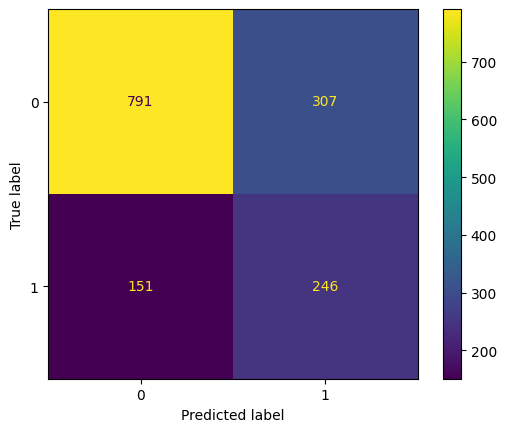

In [454]:
#Revisión visual de matriz de confusión de modelo arbol 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_4.classes_)
disp.plot();

In [455]:
#Revisión de Recall con validación cruzada
recall_scores_4 = cross_val_score(
    arbol_4, X, y, scoring='recall', cv=5
)
#Construcción del intervalo de confianza
recall_scores_4_media=recall_scores_4.mean()
recall_scores_4_desvst=recall_scores_4.std()
print(f'El recall del modelo 1 es {round(recall_scores_4_media,3)} +- {round(recall_scores_4_desvst*2,3)}')

El recall del modelo 1 es 0.641 +- 0.06


In [459]:
#Modelo con data Test
y_pred_val_4 = arbol_4.predict(X_test)
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_test, y_pred_val_4))
print("Precision:", precision_score(y_test, y_pred_val_4, average='binary'))
print("Recall:", recall_score(y_test, y_pred_val_4, average='binary'))
print("F1-score:", f1_score(y_test, y_pred_val_4, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_val_4))

Accuracy: 0.6758293838862559
Precision: 0.4192708333333333
Recall: 0.575
F1-score: 0.48493975903614456

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       775
           1       0.42      0.57      0.48       280

    accuracy                           0.68      1055
   macro avg       0.62      0.64      0.62      1055
weighted avg       0.72      0.68      0.69      1055



###2.5.Modelo KNN

In [462]:
#Datos a usar (25% para validación)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)
#Definición del modelo (considerando los mejores parámetros calculados)
model=KNeighborsClassifier(n_neighbors=5)
knn_5 = ImbPipeline([
    ('oversample', SMOTE(random_state=42)),
    ('knn', model)
])
#Entrenamiento del modelo
knn_5.fit(X_train,y_train)



Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier())])

In [464]:
#Cálculo de predicciones
y_pred_knn = knn_5.predict(X_val)

In [465]:
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Precision:", precision_score(y_val, y_pred_knn, average='binary'))
print("Recall:", recall_score(y_val, y_pred_knn, average='binary'))
print("F1-score:", f1_score(y_val, y_pred_knn, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_knn))

Accuracy: 0.7143812709030101
Precision: 0.47564935064935066
Recall: 0.7380352644836272
F1-score: 0.5784797630799605

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.71      0.78      1098
           1       0.48      0.74      0.58       397

    accuracy                           0.71      1495
   macro avg       0.68      0.72      0.68      1495
weighted avg       0.77      0.71      0.73      1495



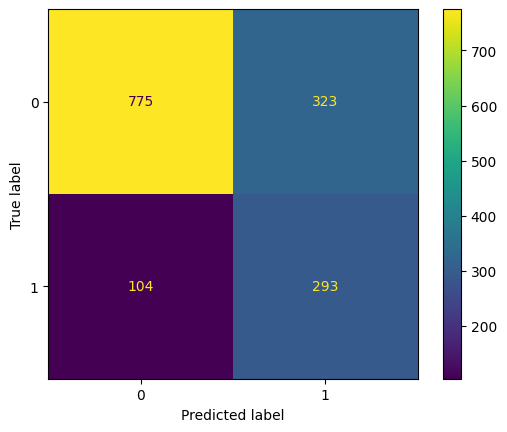

In [466]:
#Revisión visual de matriz de confusión de modelo arbol 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_5.classes_)
disp.plot();

In [467]:
#Revisión de Recall con validación cruzada
recall_scores_knn_5 = cross_val_score(
    knn_5, X, y, scoring='recall', cv=5
)
#Construcción del intervalo de confianza
recall_scores_media=recall_scores_knn_5.mean()
recall_scores_desvst=recall_scores_knn_5.std()
print(f'El recall del modelo 1 es {round(recall_scores_media,3)} +- {round(recall_scores_desvst*2,3)}')

El recall del modelo 1 es 0.736 +- 0.058


In [468]:
#Modelo con data Test
y_pred_val_knn = knn_5.predict(X_test)
# Evaluación con distintas métricas
print("Accuracy:", accuracy_score(y_test, y_pred_val_knn))
print("Precision:", precision_score(y_test, y_pred_val_knn, average='binary'))
print("Recall:", recall_score(y_test, y_pred_val_knn, average='binary'))
print("F1-score:", f1_score(y_test, y_pred_val_knn, average='binary'))

# Resumen completo
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_val_knn))

Accuracy: 0.6729857819905213
Precision: 0.42761692650334077
Recall: 0.6857142857142857
F1-score: 0.5267489711934157

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       775
           1       0.43      0.69      0.53       280

    accuracy                           0.67      1055
   macro avg       0.64      0.68      0.64      1055
weighted avg       0.74      0.67      0.69      1055



##✅3.Conclusiones

* ✅ El modelo seleccionado es un Árbol de Decisión con parámetros optimizados y técnica de oversampling (SMOTE), ya que obtuvo la mayor sensibilidad (recall = 0.71) en validación cruzada.

* 📈 El recall del 71% indica que el modelo es capaz de detectar correctamente el 71% de los casos positivos, lo que es especialmente relevante en detección de posibles churn y tomar acción anticipado.

* 🎯 La precisión del 72% sugiere que, cuando el modelo predice positivo, acierta en un 72% de los casos.

* 🔁 La validación cruzada con 5 particiones estratificadas garantiza que el rendimiento del modelo es estable y generalizable, evitando overfitting.